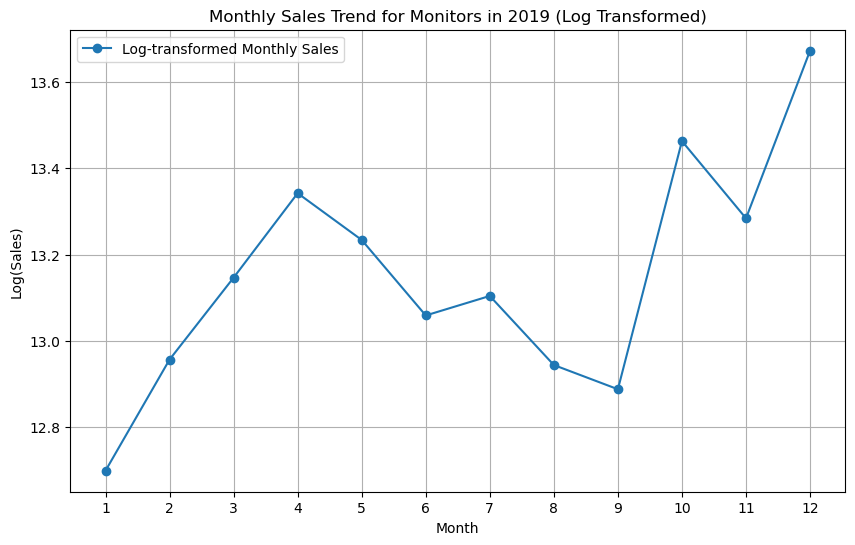

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'SalesData.csv' with the actual file path
data = pd.read_csv('data/SalesData.csv')

# Step 2: Parse dates correctly
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y %H:%M')

# Step 3: Filter data for 'Monitors' in Product Category and year 2019
monitor_data = data[(data['Product Category'] == 'Monitors') & (data['Order Date'].dt.year == 2019)].copy()

# Add a new column for Month safely
monitor_data['Month'] = monitor_data['Order Date'].dt.month

# Step 4: Calculate total monthly sales
monthly_sales = monitor_data.groupby('Month').agg({'Sales': 'sum'}).reset_index()

# Step 5: Handle outliers using log transformation
# Log transformation to reduce skewness and minimize the impact of outliers
monthly_sales['Sales'] = np.log1p(monthly_sales['Sales'])

# Step 6: Visualize trends in sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', label='Log-transformed Monthly Sales')
plt.title('Monthly Sales Trend for Monitors in 2019 (Log Transformed)')
plt.xlabel('Month')
plt.ylabel('Log(Sales)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()
